In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

# Uploading excel files (previously generated by SAS)
data_input1 = pd.read_excel('D:/연구/인공지능/Generalizable model/AI융합연구지원사업/2022_05_23/Pembrolizumab_preprocessing_training_0527.xlsx') 
data_input2 = pd.read_excel('D:/연구/인공지능/Generalizable model/AI융합연구지원사업/2022_05_23/Pembrolizumab_preprocessing_training_0527_5.xlsx')

In [33]:
data_label1 = data_input1['Label']
data_feature1 = data_input1.iloc[:,2:50]

data_label2 = data_input2['Label']
data_feature2 = data_input2.iloc[:,2:50]

from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(data_feature1, data_label1, test_size = 0.25, random_state=180)
x_train2, x_test2, y_train2, y_test2 = train_test_split(data_feature2, data_label2, test_size = 0.25, random_state=180)

#모델설정
sm = SMOTE(random_state=0)

# train데이터를 넣어 복제함
x_resampled1, y_resampled1 = sm.fit_resample(x_train1, y_train1)
x_resampled2, y_resampled2 = sm.fit_resample(x_train2, y_train2)


print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train1.shape, y_train1.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_resampled1.shape, y_resampled1.shape)
print('SMOTE 적용 전 전체 레이블 값 분포: \n', pd.Series(data_label1).value_counts())
print('SMOTE 적용 전 학습 레이블 값 분포: \n', pd.Series(y_train1).value_counts())
print('SMOTE 적용 후 학습 레이블 값 분포: \n', pd.Series(y_resampled1).value_counts())

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', x_train2.shape, y_train2.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_resampled2.shape, y_resampled2.shape)
print('SMOTE 적용 전 전체 레이블 값 분포: \n', pd.Series(data_label2).value_counts())
print('SMOTE 적용 전 학습 레이블 값 분포: \n', pd.Series(y_train2).value_counts())
print('SMOTE 적용 후 학습 레이블 값 분포: \n', pd.Series(y_resampled2).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (1002, 47) (1002,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (1678, 47) (1678,)
SMOTE 적용 전 전체 레이블 값 분포: 
 1    1110
0     227
Name: Label, dtype: int64
SMOTE 적용 전 학습 레이블 값 분포: 
 1    839
0    163
Name: Label, dtype: int64
SMOTE 적용 후 학습 레이블 값 분포: 
 0    839
1    839
Name: Label, dtype: int64
SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (678, 47) (678,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (1026, 47) (1026,)
SMOTE 적용 전 전체 레이블 값 분포: 
 1    678
0    227
Name: Label, dtype: int64
SMOTE 적용 전 학습 레이블 값 분포: 
 1    513
0    165
Name: Label, dtype: int64
SMOTE 적용 후 학습 레이블 값 분포: 
 0    513
1    513
Name: Label, dtype: int64


In [34]:
from sklearn.metrics import roc_auc_score, roc_curve # Import function for estimating performance
from sklearn.model_selection import GridSearchCV, StratifiedKFold # Import function for cross-validation and hyperparameter tuning
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc 
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [36]:
import xgboost as xgb
from xgboost import XGBClassifier #Import gradient boosting machine

#Training gradient boosting machine algorithm by using training set
xgb1 = XGBClassifier()

xgb_params_grid1 = {
         'n_estimators':[1000], 'eta':[0.01],
         #'max_depth':[20,40.60,80], 'min_child_weight':[10,20.30,40,50,60], 'gamma':[1], 
         #'colsample_bytree':[0.8,0.9,1], 
         'random_state':[111]
        }

skf_infli = StratifiedKFold(n_splits=20) #5-fold cross validation

xgb1 = GridSearchCV(xgb1, param_grid=xgb_params_grid1, scoring="accuracy", cv=skf_infli, n_jobs = -1, verbose = -1)
xgb1 = xgb1.fit(x_resampled1, y_resampled1)

print("Best performance : {0:.4f}".format(xgb1.best_score_))
print("Best parameters: ", xgb1.best_params_)

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:32:03] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best performance : 0.9428
Best parameters:  {'eta': 0.01, 'n_estimators': 1000, 'random_state': 111}


In [35]:
#Training gradient boosting machine algorithm by using training set
xgb2 = XGBClassifier()

xgb_params_grid2 = {
         'n_estimators':[1000], 'eta':[0.01],
         #'max_depth':[20,40.60,80], 'min_child_weight':[10,20.30,40,50,60], 'gamma':[1], 
         #'colsample_bytree':[0.8,0.9,1], 
         'random_state':[100]
        }

skf_infli = StratifiedKFold(n_splits=20) #5-fold cross validation

xgb2 = GridSearchCV(xgb2, param_grid=xgb_params_grid2, scoring="accuracy", cv=skf_infli, n_jobs = -1, verbose = -1)
xgb2 = xgb2.fit(x_resampled2, y_resampled2)

print("Best performance : {0:.4f}".format(xgb2.best_score_))
print("Best parameters: ", xgb2.best_params_)

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:31:26] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best performance : 0.9244
Best parameters:  {'eta': 0.01, 'n_estimators': 1000, 'random_state': 100}


검증데이터셋에서 AUROC: 0.8795
검증데이터셋에서 AUPRC: 0.9827
검증데이터셋에서 F1: 0.9513
검증데이터셋에서 AUROC: 0.8375
검증데이터셋에서 AUPRC: 0.9166
검증데이터셋에서 F1: 0.8743


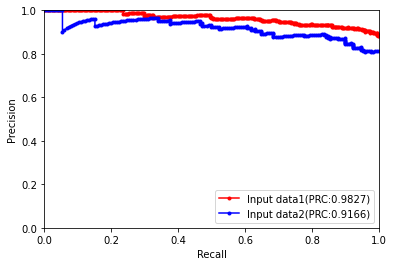

In [40]:
def plot_prc_curve_data1(recall,precision,label=None):
    plt.plot(recall, precision, marker='.', color='red', label=label)
    plt.axis([0,1,0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="lower right")
    
def plot_prc_curve_data2(recall,precision,label=None):
    plt.plot(recall, precision, marker='.', color='Blue', label=label)
    plt.axis([0,1,0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="lower right")

xgb1_roc_score = roc_auc_score(y_test1, xgb1.predict_proba(x_test1)[:,1], average='macro')   
xgb_probs1 = xgb1.predict_proba(x_test1)[:,1]
y_hat1 = xgb1.predict(x_test1)
xgb_precision1, xgb_recall1, _ = precision_recall_curve(y_test1,xgb_probs1)

xgb2_roc_score = roc_auc_score(y_test2, xgb2.predict_proba(x_test2)[:,1], average='macro')

xgb_probs2 = xgb2.predict_proba(x_test2)[:,1]
y_hat2 = xgb2.predict(x_test2)
xgb_precision2, xgb_recall2, _ = precision_recall_curve(y_test2,xgb_probs2)
xgb_f1_2, xgb_auprc_2 = f1_score(y_test1,y_hat1), auc(xgb_recall1,xgb_precision1)

print('검증데이터셋에서 AUROC: %.4f' % (xgb1_roc_score)) 
print('검증데이터셋에서 AUPRC: %.4f' % (xgb_auprc_1))
print('검증데이터셋에서 F1: %.4f' % (xgb_f1_1))

xgb_f1_2, xgb_auprc_2 = f1_score(y_test2,y_hat2), auc(xgb_recall2,xgb_precision2)
print('검증데이터셋에서 AUROC: %.4f' % (xgb2_roc_score)) 
print('검증데이터셋에서 AUPRC: %.4f' % (xgb_auprc_2))
print('검증데이터셋에서 F1: %.4f' % (xgb_f1_2))

plot_prc_curve_data1(xgb_recall1, xgb_precision1,label='Input data1(PRC:0.9827)')
plot_prc_curve_data2(xgb_recall2, xgb_precision2,label='Input data2(PRC:0.9166)')
plt.legend(loc="lower right")
plt.savefig('DATASET', dpi=300)
plt.show()

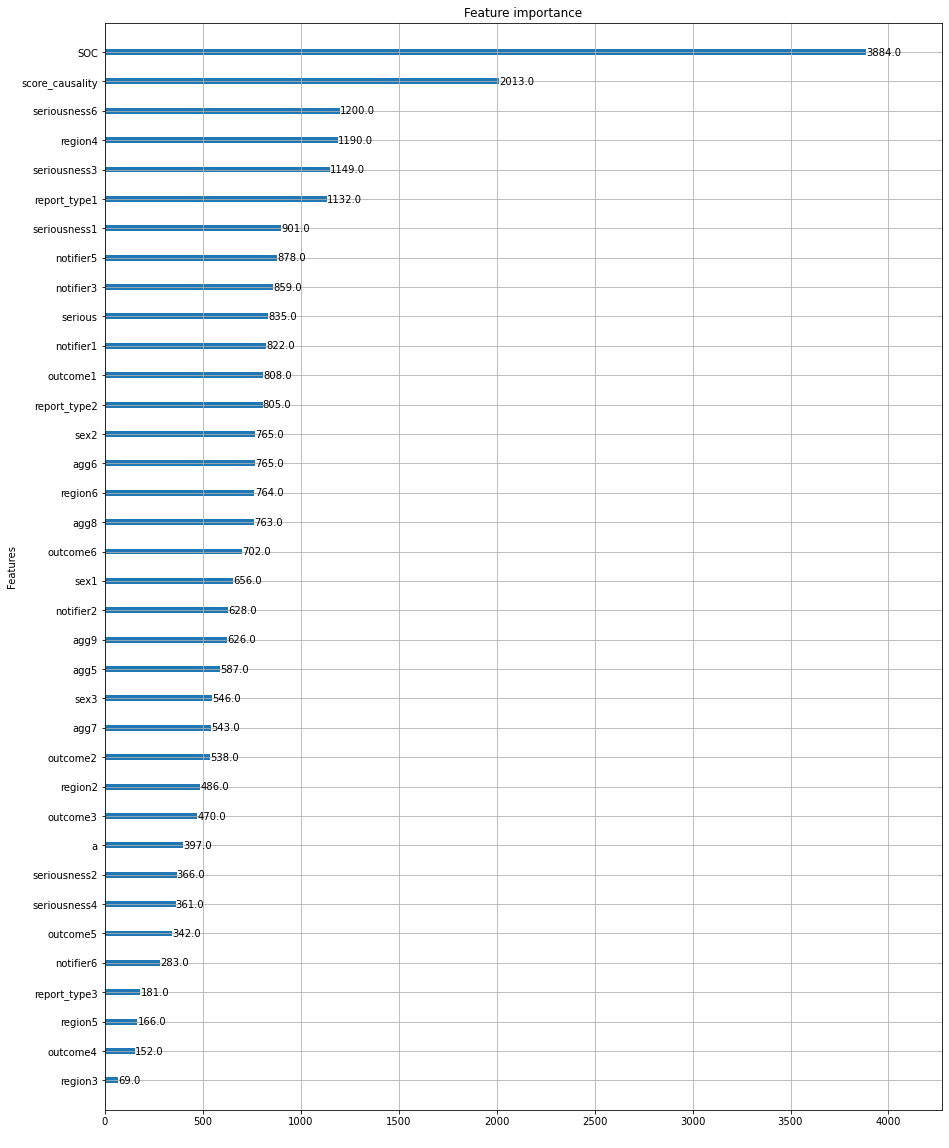

In [38]:
import xgboost

fig, ax = plt.subplots(figsize=(15,20))
xgboost.plot_importance(xgb1.best_estimator_, xlabel = ' ', title = 'Feature importance', ax=ax)
plt.savefig('F_importance_data1', dpi=300)

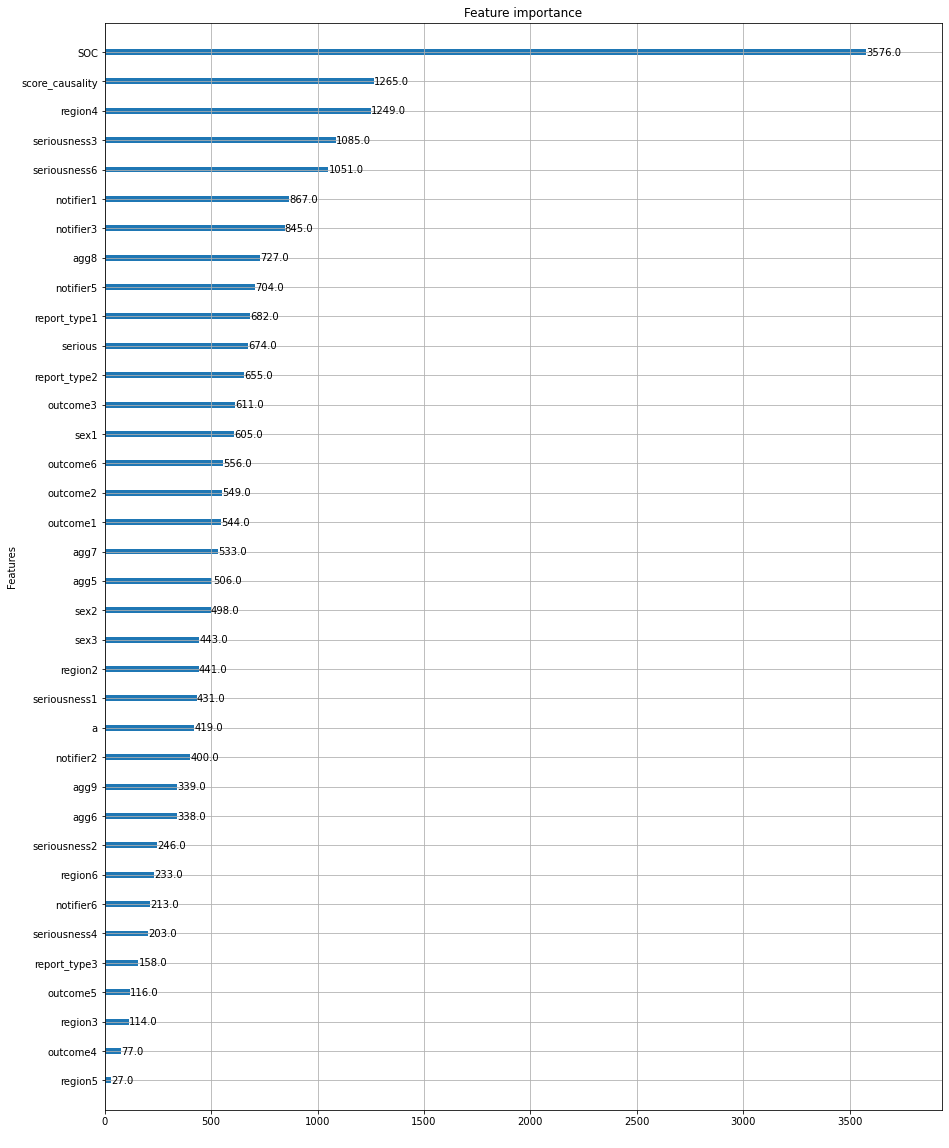

In [39]:
import xgboost

fig, ax = plt.subplots(figsize=(15,20))
xgboost.plot_importance(xgb2.best_estimator_, xlabel = ' ', title = 'Feature importance', ax=ax)
plt.savefig('F_importance_data2', dpi=300)